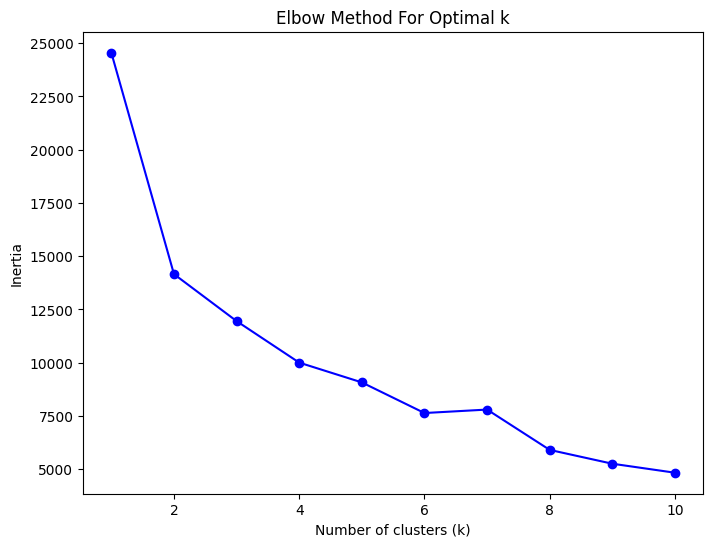

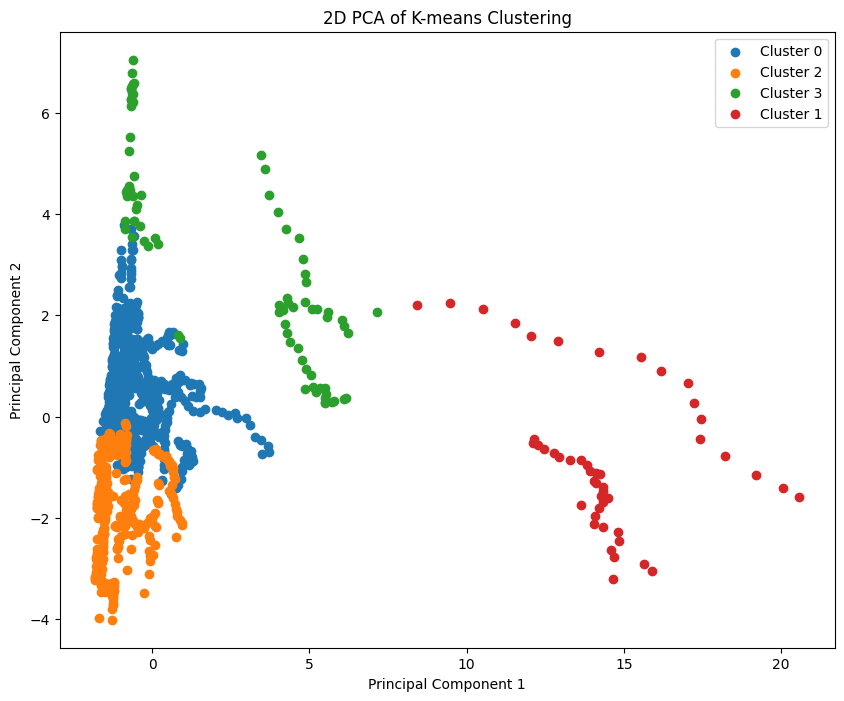

Cluster 0:
['Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'original_dataset.csv'
dataset = pd.read_csv(file_path)

# Replace 'n.a.' with NaN and convert all values to numeric where possible
dataset.replace('n.a.', pd.NA, inplace=True)
dataset = dataset.apply(pd.to_numeric, errors='ignore')

# Fill missing values with the mean of the respective columns
dataset.fillna(dataset.mean(numeric_only=True), inplace=True)

# Preserve the country column
countries = dataset['country']

# Drop the categorical columns and 'country' column for clustering
categorical_cols = ['Region', 'country', 'Year']
features = dataset.drop(categorical_cols, axis=1)

# Standardizing the numerical variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Apply KMeans with the optimal number of clusters (4 in this case)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Create a DataFrame with PCA results and clusters
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = clusters
pca_df['country'] = countries.values

plt.figure(figsize=(10, 8))
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of K-means Clustering')
plt.legend()
plt.show()

# Create a DataFrame for clustering results
result_df = pd.DataFrame({'country': countries.values, 'Cluster': clusters})

# Show countries in each cluster
clusters_countries = result_df.groupby('Cluster')['country'].apply(list)

# Display the countries in each cluster
for cluster_id, countries in clusters_countries.items():
    print(f"Cluster {cluster_id}:")
    print(countries)
    print()